In [168]:
#from math import *
import numpy as np                            #Используется для работы с массивами и математическими операциями
import matplotlib.pyplot as plt               #Используется для создания графиков
from numpy.fft import fft, rfft, rfftfreq     #Используется для реализации преобразования Фурье
from numpy.random import uniform              #Используется для создания "шума"

### Создаём функцию для расчёта зависимости вида:

$$y(t)=exp(-\big(\frac {t-t_0} {\tau} \big)^2\big)$$

В качестве варьируемого параметра используется величина: $$\tau$$

In [169]:
t0=1                                              #Начальная точка
t_start=0                                         #Первый элемент массива времени
t_finish=2                                        #Последний элемент массива времени
t_step=0.00001                                    #Шаг по времени с которым производятся вычисления
tmas=np.arange(t_start,t_finish+t_step,t_step)    #Массив времени заданным шагом

def exp_calc(tay):
    if len(tay)==3:                                   #Условие на корректность вызова функции
        ymas1=np.exp(-((tmas-t0)/tay[0])**2)          #Расчёт первого варианта с tay1
        ymas2=np.exp(-((tmas-t0)/tay[1])**2)          #Расчёт второго варианта с tay2
        ymas3=np.exp(-((tmas-t0)/tay[2])**2)          #Расчёт третьего варианта с tay3
        return ymas1, ymas2, ymas3, tay[0], tay[1], tay[2]                       #Возвращает необходимые значения
    else: print('Введите три значения tay для расчёта.')                         #Выводит предупреждение
    

Вызовем функцию, передав ей в качестве аргумента список из 3 величин tay для расчёта.

In [170]:
ymas1, ymas2, ymas3, tay1, tay2, tay3 = exp_calc([0.5, 0.25, 0.125])

Создаём функцию для визуализации

In [171]:
def im_t(x,y1,y2,y3,l1,l2,l3,xl,yl):
    plt.plot(x,y1, label = l1)
    plt.plot(x,y2, label = l2)
    plt.plot(x,y3, label = l3)
    plt.grid(True)
    plt.ylabel(yl)
    plt.xlabel(xl)
    plt.legend()
    #plt.title('exp')
    plt.show()

In [172]:
def im_ff(x,y1,y2,y3,l1,l2,l3,xl,yl,xmax):
    fig, ax = plt.subplots()
    ax.plot(x,y1, label = l1)
    ax.plot(x,y2, label = l2)
    ax.plot(x,y3, label = l3)
    ax.grid(True)
    ax.set_ylabel(yl)
    ax.set_xlabel(xl)
    plt.legend()
    ax.set_xlim(-xmax*0.1, xmax*1.1)
    #plt.title('exp')
    plt.show()

Вызываем функцию для визуализации и получаем график от времени.

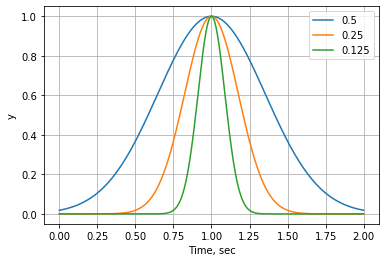

In [173]:
im_t(tmas,                     #Массив времён (ось абсцисс)
   ymas1, ymas2, ymas3,      #Массивы значений функции для трёх рассматриваемых случаев (ось ординат)
   tay1, tay2, tay3,         #Значения tay, используемые для расчёта (отображаются в легенде)
   'Time, sec','y')          #Подписи осей


Получаем спектры путём использования преобразования Фурье

In [174]:
spectrum1 = rfft(ymas1)
spectrum2 = rfft(ymas2)
spectrum3 = rfft(ymas3)

Вызываем функцию для визуализации и получаем график от частоты.

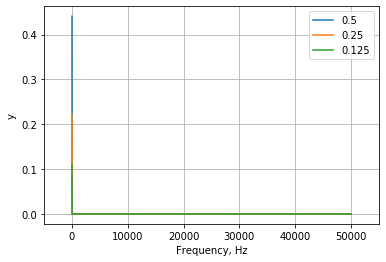

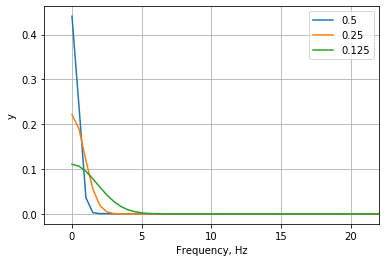

In [175]:
im_ff(rfftfreq(len(tmas), t_step), 
   np.abs(spectrum1)/len(ymas1), 
   np.abs(spectrum2)/len(ymas2), 
   np.abs(spectrum3)/len(ymas3),
   tay1, tay2, tay3, 
   'Frequency, Hz','y',max(rfftfreq(len(tmas), t_step)))
im_ff(rfftfreq(len(tmas), t_step), 
   np.abs(spectrum1)/len(ymas1), 
   np.abs(spectrum2)/len(ymas2), 
   np.abs(spectrum3)/len(ymas3),
   tay1, tay2, tay3, 
   'Frequency, Hz','y',20)


### Создаём функцию для расчёта зависимости вида:

$$y(t)=cos(2 \Pi f_0 t)$$

В качестве варьируемого параметра используется величина: $$f_0$$.

In [176]:
dt=0.0001                                                            #Шаг по времени
t_all=1                                                            #Время окончания
N=int(t_all/dt)                                                    #Количество элементов в списке
def cos_calc(f0):
    if len(f0)==3:                                                           #Условие для проверки корректности вызова функции
        cos_sig1=np.array([np.cos(2*np.pi*f0[0]*t*dt) for t in range(N)])    #Расчёт первого варианта с f0_1
        cos_sig2=np.array([np.cos(2*np.pi*f0[1]*t*dt) for t in range(N)])    #Расчёт второго варианта с f0_2
        cos_sig3=np.array([np.cos(2*np.pi*f0[2]*t*dt) for t in range(N)])    #Расчёт третьего варианта с f0_3
        return cos_sig1,cos_sig2,cos_sig3,f0[0],f0[1],f0[2]                  #Переменные, которые возвращает функция
    else: print('Введите три значения f0 для расчёта.')                      #Предупреждение
    

Вызываем функцию и передаё ей список из 3 значения частоты f0

In [177]:
cos_sig1,cos_sig2,cos_sig3,f0_1,f0_2,f0_3 = cos_calc([50,10,5])

Вызываем функцию визуализации

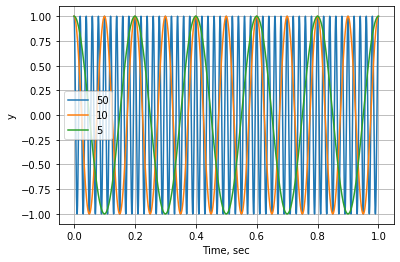

In [178]:
im(np.arange(N)*dt,
   cos_sig1,cos_sig2,cos_sig3,
   f0_1,f0_2,f0_3, 
   'Time, sec','y')

Выполняем преобразование фурье

In [179]:
spectrum_cos1 = rfft(cos_sig1)
spectrum_cos2 = rfft(cos_sig2)
spectrum_cos3 = rfft(cos_sig3)

Вызываем функцию визуализации

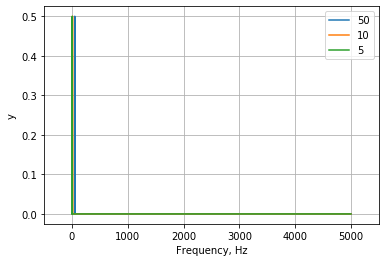

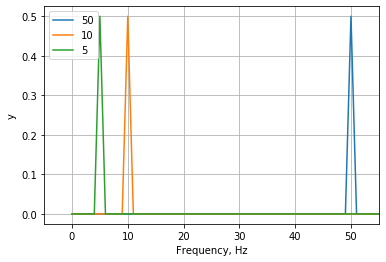

In [180]:
im_ff(rfftfreq(N, dt), 
   np.abs(spectrum_cos1)/N, 
   np.abs(spectrum_cos2)/N, 
   np.abs(spectrum_cos3)/N,
   f0_1,f0_2,f0_3, 
   'Frequency, Hz','y', max(rfftfreq(N, dt)))

im_ff(rfftfreq(N, dt), 
   np.abs(spectrum_cos1)/N, 
   np.abs(spectrum_cos2)/N, 
   np.abs(spectrum_cos3)/N,
   f0_1,f0_2,f0_3, 
   'Frequency, Hz','y', 50)

### Попробуем добавить случайный шум
и посмотрим, как это отразится на графике после преобразования Фурье

In [181]:
a=1.
b=2.
c=5.
noise1 = uniform(-a,a, N)
noise2 = uniform(-b,b, N)
noise3 = uniform(-c,c, N)

Суммируем значения сигнала с шумом

In [182]:
cos_sig_noise1 = cos_sig1 + noise1
cos_sig_noise2 = cos_sig1 + noise2
cos_sig_noise3 = cos_sig1 + noise3

Создаём функцию для визуализации исходного сигнала и зашумленного

In [191]:
def im_noise(y,fr_n):
    plt.plot(np.arange(N)*dt, y, label= fr_n)
    plt.plot(np.arange(N)*dt, cos_sig1, 'r', label= 'Тон 50 Гц') 
    plt.xlabel('Время, c') 
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

Вызываем функцию для трёх различных случаев уровня шума

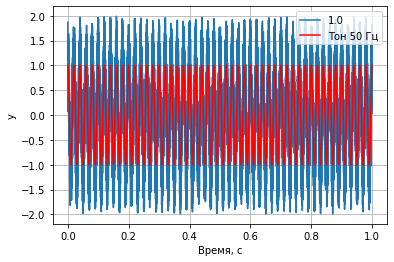

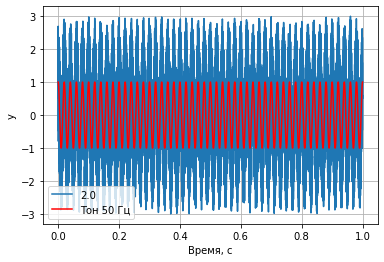

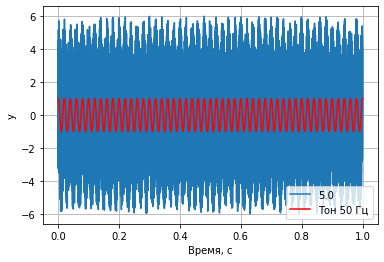

In [192]:
im_noise(cos_sig_noise1,a)
im_noise(cos_sig_noise2,b)
im_noise(cos_sig_noise3,c)

Выполняем преобразование фурье

In [193]:
spectrum_cos_noise1 = rfft(cos_sig_noise1)
spectrum_cos_noise2 = rfft(cos_sig_noise2)
spectrum_cos_noise3 = rfft(cos_sig_noise3)

Вызываем функцию для визуализации

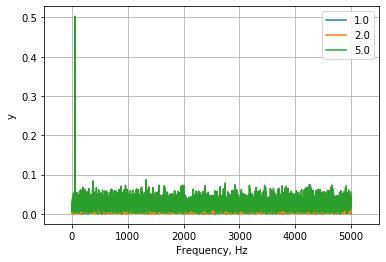

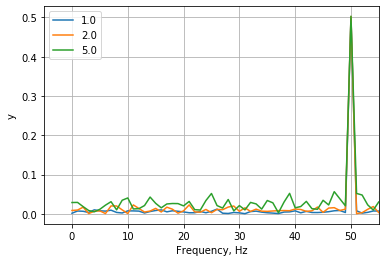

In [197]:
im_ff(rfftfreq(N, dt),
   np.abs(spectrum_cos_noise1)/N, 
   np.abs(spectrum_cos_noise2)/N, 
   np.abs(spectrum_cos_noise3)/N,
   a,b,c,
   'Frequency, Hz','y',max(rfftfreq(N, dt)))

im_ff(rfftfreq(N, dt),
   np.abs(spectrum_cos_noise1)/N, 
   np.abs(spectrum_cos_noise2)/N, 
   np.abs(spectrum_cos_noise3)/N,
   a,b,c,
   'Frequency, Hz','y',50)